In [75]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Pipeline and machine learning algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier

# Model fine-tuning and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.metrics import accuracy_score

In [76]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [77]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [78]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
ntest = test_data.shape[0]
ntrain = train_data.shape[0]

y_train = train_data['Survived'].values
passId = test_data['PassengerId']

dataset = pd.concat((train_data, test_data))

/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [81]:
dataset.isnull().sum(axis = 0)

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [82]:
dataset.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [83]:
def set_title(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [84]:
# Applying the get_title function to create the new 'Title' feature
dataset['Title'] = dataset['Name'].map(lambda x: get_title(x))
dataset['Title'] = dataset.apply(set_title, axis=1)

In [85]:
# Fill missing data 
dataset['Fare'].fillna(method ='ffill', inplace = True)
dataset['Family Size'] = dataset['SibSp'] + dataset['Parch']

In [86]:
# Extract last name
dataset['Last_Name'] = dataset['Name'].apply(lambda x: str.split(x, ",")[0])

# Fill in missing Fare value by overall Fare mean
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)

# Setting coin flip (e.g. random chance of surviving)
default_survival_chance = 0.5
dataset['Family_Survival'] = default_survival_chance

# Grouping dataset by last name and fare - looking for families
for grp, grp_df in dataset[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    # If not equal to 1, a family is found 
    # Then work out survival chance depending on whether or not that family member survived
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin == 0.0):
                dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 0

# Print the headline
print("Number of passengers with family survival information:", 
      dataset.loc[dataset['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [87]:
# Find Ages with Random Forest
age_df = dataset[['Age', 'Fare', 'Title', 'Parch', 'SibSp']]
age_df['Title'] = age_df['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master'], [0, 1, 2, 3])
# Split sets into train and test
train_age = age_df.loc[ (dataset.Age.notnull()) ]# known Age values
test_age = age_df.loc[ (dataset.Age.isnull()) ]# null Ages

# All age values are stored in a target array
ya = train_age.values[:, 0]

# All the other values are stored in the feature array
Xa = train_age.values[:, 1::]

# Create and fit a model
rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
rtr.fit(Xa, ya)

# Use the fitted model to predict the missing values
predictedAges = rtr.predict(test_age.values[:, 1::])

/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
# Bin Fare for even spread 
dataset['Fare'] = pd.qcut(dataset['Fare'], 4)
lbl = LabelEncoder()
dataset['Fare'] = lbl.fit_transform(dataset['Fare'])

# Bin Age for even spread 
dataset.loc[ (dataset.Age.isnull()), 'Age' ] = predictedAges
dataset['Age'] = pd.qcut(dataset['Age'], 4)
lbl = LabelEncoder()
dataset['Age'] = lbl.fit_transform(dataset['Age'])

# Convert cabin
# dataset['Cabin'].fillna('Unknown',inplace=True)
# dataset['Cabin'] = dataset['Cabin'].map(lambda x: x[0])
# dataset['Cabin'] = dataset['Cabin'].apply(lambda x: 1 if x == 'U' else 0)

# Convert Catagorical Data
dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
dataset['Title'] = dataset['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master'], [0, 1, 2, 3])

In [94]:
# Drop columns that have little impact on the %
dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Ticket', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Embarked', axis=1, inplace=True)
dataset.drop('Parch', axis=1, inplace=True)
dataset.drop('SibSp', axis=1, inplace=True)
dataset.drop('Cabin', axis=1, inplace=True)
dataset.drop('Survived', axis=1, inplace=True)
dataset.drop('Last_Name', axis=1, inplace=True)

KeyError: "['PassengerId'] not found in axis"

In [95]:
dataset.drop('Last_Name', axis=1, inplace=True)

In [96]:
dataset.corr()

,Age,Fare,Pclass,Sex,Title,Family Size,Family_Survival
Age,1.000000,0.182556,-0.405834,-0.076441,-0.152733,-0.181996,0.083457
Fare,0.182556,1.000000,-0.664416,0.229698,0.326717,0.441508,0.130077
Pclass,-0.405834,-0.664416,1.000000,-0.124617,-0.076700,0.050027,-0.237929
Sex,-0.076441,0.229698,-0.124617,1.000000,0.644876,0.188583,0.000857
Title,-0.152733,0.326717,-0.076700,0.644876,1.000000,0.410798,-0.000600
Family Size,-0.181996,0.441508,0.050027,0.188583,0.410798,1.000000,-0.093858
Family_Survival,0.083457,0.130077,-0.237929,0.000857,-0.000600,-0.093858,1.000000


In [97]:
X_train = dataset[:ntrain]
X_test = dataset[ntrain:]


# Scaling data to support modelling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
#Setup Models 
# Initiate 11 classifier models
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train_scaled, y_train)
    acc = cross_val_score(mod, X_train_scaled, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [99]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,SVC,0.854079
1,Random Forest,0.850834
2,Logistic Regression,0.850783
3,Gradient Boosting,0.845166
4,Gaussian Process,0.840708
5,XGBoost,0.840671
6,Bagging Classifier,0.837350
7,AdaBoost,0.837312
8,K Nearest Neighbour,0.830696
9,Extra Trees,0.827263


<IPython.core.display.Javascript object>


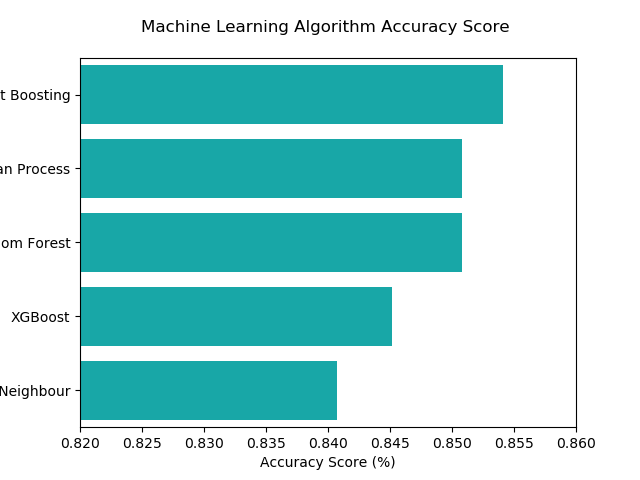

(0.8, 0.86)

In [100]:
# Plot results
sns.barplot(x='Score', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.80, 0.86)

In [101]:
# Getting feature importances for the 5 models where we can
gbc_imp = pd.DataFrame({'Feature':X_train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':X_train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':X_train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':X_train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':X_train.columns, 'ada importance':ada.feature_importances_})

# Merging results into a single dataframe
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# Calculating average importance per feature
importances['Average'] = importances.mean(axis=1)

# Ranking top to bottom
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# Display
importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,Title,0.550924,0.535259,0.346211,0.139376,0.14,0.342354
1,Family_Survival,0.190963,0.184758,0.141815,0.141643,0.14,0.159836
2,Pclass,0.152009,0.149631,0.124786,0.135163,0.20,0.152318
3,Family Size,0.043398,0.057105,0.096973,0.084318,0.30,0.116359
4,Sex,0.003616,0.018929,0.125235,0.355466,0.00,0.100649
5,Fare,0.038642,0.032083,0.076059,0.078483,0.12,0.069053
6,Age,0.020448,0.022235,0.088920,0.065551,0.10,0.059431


In [23]:
# Random Forest
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# Fitting model and return results
gd.fit(X_train_scaled, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8338945005611672
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed:  1.3min finished


In [102]:
#  KNeighbors 
# Parameter's to search
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

# Setting up parameter grid
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

# Run GridSearch CV
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:    2.9s


0.8395061728395061
KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    6.2s finished
/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
# GaussianProcess
# Parameter's to search
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

# Setting up parameter grid
hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

# Run GridSearch CV
gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# Fitting model and return results
gd.fit(X_train_scaled, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.8327721661054994
GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=1,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=True)


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   31.2s finished


In [26]:
# # GradientBoosting
# # Parameter's to search
# learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
# n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

# # Setting up parameter grid
# hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
# gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
#                 verbose=True, cv=5, scoring = "accuracy",n_jobs=-1)

# # Fitting model and return results
# gd.fit(X_train_scaled, y_train)
# print(gd.best_score_)
# print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  2.3min finished


0.8361391694725028
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=750,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [29]:
# # XGB
# # Parameter's to search
# learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
# max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
# min_child_weight = [ 1, 3, 5, 7 ]
# gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
# colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ]

# # Setting up parameter grid
# hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators,
#               'max_depth': max_depth, 'min_child_weight': min_child_weight,
#               'gamma': gamma,
#               'reg_alpha': reg_alpha}

# # Run GridSearch CV
# gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
#                 verbose=True, cv=5, scoring = "accuracy",n_jobs=-1)

# # Fitting model and return results
# gd.fit(X_train_scaled, y_train)
# print(gd.best_score_)
# print(gd.best_estimator_)


Fitting 5 folds for each of 43200 candidates, totalling 216000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1550 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 3332 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5537 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 8378 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 10733 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 15593 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 19982 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 26899 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 32232 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 39485 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 48386 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 57362 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 67447 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 76943 

0.8406285072951739
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [103]:
ran = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Knn = KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

gpc = GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=1,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=True)

gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=750,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Lists
models = [ran, knn, xgb, gbc, gpc]         
scores_v3 = []

# Fit & cross-validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train_scaled, y_train, scoring = "accuracy", cv = 10,n_jobs=-1)
    scores_v3.append(acc.mean())

In [104]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'XGBoost', 'Gradient Boosting', 'Gaussian Process'],
    'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score with tuned parameters
0,Gradient Boosting,0.849610
1,Gaussian Process,0.848523
2,Random Forest,0.840633
3,XGBoost,0.834004
4,K Nearest Neighbour,0.830696


In [105]:
# Plot results
sns.barplot(x='Score with tuned parameters', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.82, 0.86)

(0.82, 0.86)

In [106]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Gaussian Process', gpc),
                                           ('K Nearest Neighbour', knn),], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv = 10)
grid_hard.fit(X_train, y_train)

print("Hard voting on train set score mean: {:.2f}". format(grid_hard_cv['fit_time'].mean()*100)) 
print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))

Hard voting on train set score mean: 60.18
Hard voting on test set score mean: 83.96


In [107]:
print(grid_hard_cv)

{'fit_time': array([0.59323215, 0.59346485, 0.59360886, 0.5957377 , 0.5983479 ,
       0.60150385, 0.64239287, 0.60129905, 0.59968686, 0.59839582]), 'score_time': array([0.01118183, 0.01024294, 0.01004314, 0.01014233, 0.01052809,
       0.01052332, 0.01016426, 0.01062703, 0.01014614, 0.01009893]), 'test_score': array([0.8       , 0.83333333, 0.79775281, 0.88764045, 0.8988764 ,
       0.82022472, 0.82022472, 0.80898876, 0.86516854, 0.86363636])}


In [108]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Gaussian Process', gpc),
                                           ('K Nearest Neighbour', knn),], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv = 10)
grid_soft.fit(X_train, y_train)

print("Soft voting on train set score mean: {:.2f}". format(grid_soft_cv['fit_time'].mean()*100)) 
print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))

Soft voting on train set score mean: 64.26
Soft voting on test set score mean: 83.85


In [109]:
print(grid_soft_cv)

{'fit_time': array([0.59909201, 0.61542583, 0.62791324, 0.655545  , 0.69378924,
       0.75470519, 0.62221479, 0.60487175, 0.60994196, 0.64249873]), 'score_time': array([0.02140903, 0.02148914, 0.0319519 , 0.02426815, 0.02178597,
       0.03532815, 0.01955509, 0.03578711, 0.01962399, 0.02158403]), 'test_score': array([0.8       , 0.83333333, 0.79775281, 0.91011236, 0.8988764 ,
       0.83146067, 0.80898876, 0.7752809 , 0.86516854, 0.86363636])}


In [112]:
predictions = grid_hard.predict(X_test)

In [113]:
submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('DSKsubmission.csv', header = True, index = False)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
